In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

On importe les deux fichier :

In [2]:
from google.colab import files
uploaded = files.upload()
cancer = pd.read_csv('30-70cancerChdEtc.csv') 
cancer = pd.DataFrame(cancer)

Saving 30-70cancerChdEtc.csv to 30-70cancerChdEtc.csv


In [3]:
from google.colab import files
uploaded = files.upload()

Saving co2.csv to co2.csv


Le premier contient l'évoluton de l'émission de co2 par pays sur plusieurs années 

Le second contient le % de morts du a des cancers, maladie respiratoire

In [58]:
co2 = pd.read_csv('co2.csv', encoding='latin1') 
co2 = pd.DataFrame(co2)

co2 = co2[(co2["Year"]<2017)&(co2["Year"]>1999)]
co2_origin = co2

On délimite des dates et on fusionne les fichiers avec un groupe by sur les pays (on renome certaines colonne)

In [17]:
co2 = co2.rename(columns={"Country": "Location"})
co2 = co2.rename(columns={"Year": "Period"})
pa = pd.concat( [cancer, co2],axis=0,ignore_index=True)
pa = pa.groupby(['Location', 'Period']).mean()
pa = pa.query("Period==2005 or Period==2000 or Period==2010 or Period==2015 or Period==2016")
pa.head(30)

First Tooltip  CO2 emission (Tons)  Population(2022)  \
Location    Period                                                         
Afghanistan 2000        34.366667         7.167974e+07        41128771.0   
            2005        34.066667         7.690770e+07        41128771.0   
            2010        31.733333         1.001490e+08        41128771.0   
            2015        29.833333         1.465925e+08        41128771.0   
            2016        29.766667         1.533371e+08        41128771.0   
Albania     2000        19.133333         1.966835e+08         2842321.0   
            2005        18.633333         2.161870e+08         2842321.0   
            2010        18.500000         2.368336e+08         2842321.0   
            2015        17.333333         2.615766e+08         2842321.0   
            2016        16.933333         2.660687e+08         2842321.0   
Algeria     2000        21.100000         2.113382e+09        44903225.0   
            2005        17.566667         2.571944e+09        44903225.0   
            2010        15.400000         3.127579e+09        44903225.0   
            2015        14.366667         3.800143e+09        44903225.0   
            2016        14.200000         3.949072e+09        44903225.0   
Andorra     2000              NaN         4.909760e+06           79824.0   
            2005              NaN         7.635776e+06           79824.0   
            2010              NaN         1.029218e+07           79824.0   
            2015              NaN         1.267378e+07           79824.0   
            2016              NaN         1.314277e+07           79824.0   
Angola      2000        24.000000         1.901396e+08        35588987.0   
            2005        21.333333         2.591042e+08        35588987.0   
            2010        18.166667         3.880989e+08        35588987.0   
            2015        16.933333         5.523754e+08        35588987.0   
            2016        16.566667         5.837792e+08        35588987.0   
Anguilla    2000              NaN         7.401280e+05               NaN   
            2005              NaN         1.282400e+06               NaN   
            2010              NaN         2.022528e+06               NaN   
            2015              NaN         2.718688e+06               NaN   
            2016              NaN         2.872576e+06               NaN   

                         Area  
Location    Period             
Afghanistan 2000     652230.0  
            2005     652230.0  
            2010     652230.0  
            2015     652230.0  
            2016     652230.0  
Albania     2000      28748.0  
            2005      28748.0  
            2010      28748.0  
            2015      28748.0  
            2016      28748.0  
Algeria     2000    2381741.0  
            2005    2381741.0  
            2010    2381741.0  
            2015    2381741.0  
            2016    2381741.0  
Andorra     2000        468.0  
            2005        468.0  
            2010        468.0  
            2015        468.0  
            2016        468.0  
Angola      2000    1246700.0  
            2005    1246700.0  
            2010    1246700.0  
            2015    1246700.0  
            2016    1246700.0  
Anguilla    2000         91.0  
            2005         91.0  
            2010         91.0  
            2015         91.0  
            2016         91.0

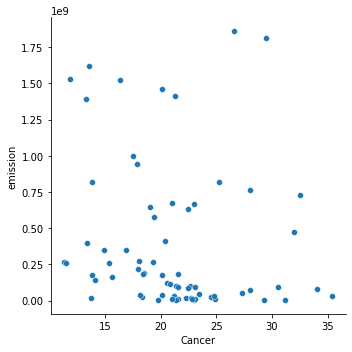

In [18]:
pa = pa.rename(columns={"CO2 emission (Tons)": "emission"})
pa = pa.rename(columns={"First Tooltip": "Cancer"})
pa_small = pa.query("emission< 0.20e10")
pa_big = pa.query("emission> 0.20e10")
sb.relplot(
    data=pa_small.sample(n=100),
    x="Cancer", y="emission", 
)

On prend un sample de 100 et on observe une corrélation très faible voir innexistante 

In [26]:
corr_pa = pa.corr()
corr_pa

,Cancer,emission,Population(2022),Area
Cancer,1.000000,-0.159941,0.025583,-0.080305
emission,-0.159941,1.000000,0.424151,0.579087
Population(2022),0.025583,0.424151,1.000000,0.443278
Area,-0.080305,0.579087,0.443278,1.000000


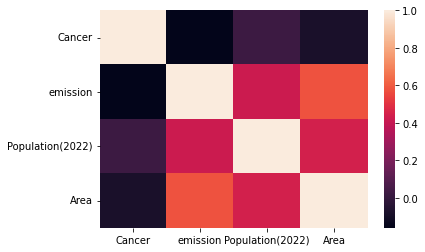

In [27]:
sb.heatmap(
    data=corr_pa,
)

D'après la heat map on peut en effet confirmer qu'il y a une corélation nul voir négative entre le taux de cancer et l'émission de co2

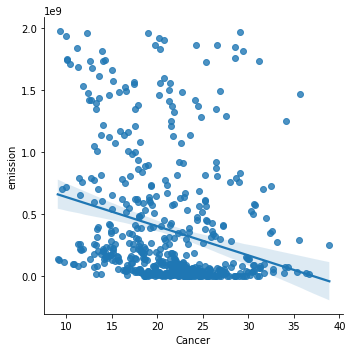

In [28]:
sb.lmplot(
    data=pa_small,
    x="Cancer", y="emission",
)

On va rechercher pourquoi en comparant séparément l'évolution du co2 produit et le taux de cancer

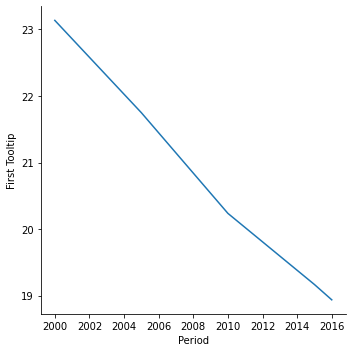

In [57]:
cancer_moye = cancer.groupby(['Period']).mean()
sb.relplot(
    data=cancer_moye,
    x="Period", y="First Tooltip", kind="line",
)

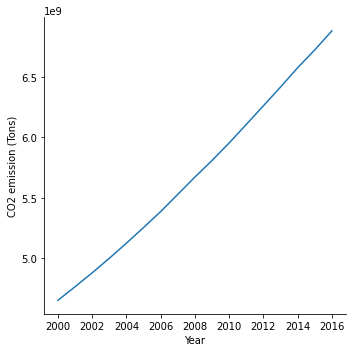

In [59]:

co2_moye = co2_origin.groupby(['Year']).mean()
sb.relplot(
    data=co2_moye,
    x="Year", y="CO2 emission (Tons)", kind="line",
)

Les deux courbes sont complètement inversé et ça s'explique par beaucoup d'élément cependant avec les données actuelle on ne peut pas conclure qu'il y a corrélation entre le CO2 rejeté et le taux de cancer

Maintenant on va chercher si le genre a un impact sur les chances d'avoir un cancer 


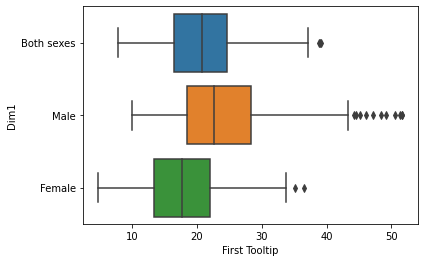

In [34]:
sb.boxplot(
    data=cancer,
    x="First Tooltip", y="Dim1",
)

On peut voir qu'il y a pas mal de variables abérantes on va donc mettre une limite à 35 % pour le taux de cancer afin d'enlever certains pays comme le Kirghizistan, le Kazakhstan, la russie qui on un taux de 50%+ 

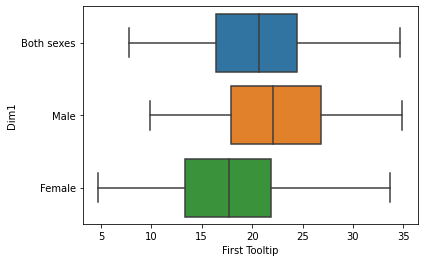

In [62]:
cancer2 = cancer[(cancer["First Tooltip"]<35)]
sb.boxplot(
    data=cancer2,
    x="First Tooltip", y="Dim1",
)

Maintenant qu'on à éloigné les variables abérante on va pouvoir comparer le taux de cancer moyen en fonction du genre

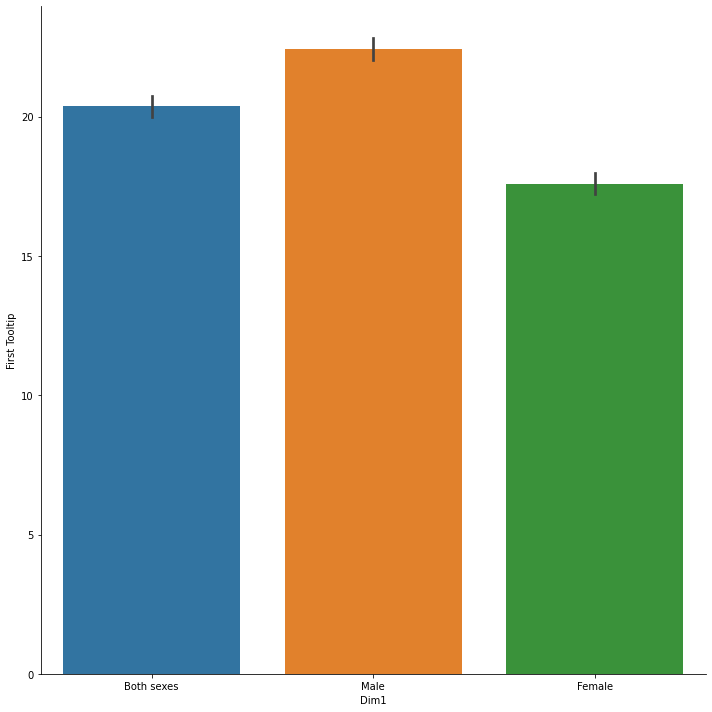

In [38]:
sb.catplot(
    data=cancer2,
    x="Dim1", y="First Tooltip", kind="bar", height=10 
)

On peut observer que les hommes on plus tendance à avoir un taux de cancer plus élevé dans le monde 

In [ ]:
cancer

In [66]:
cancer_grp = cancer.groupby(['Dim1']).mean()
cancer2["First Tooltip"].describe()

count    2662.000000
mean       20.074455
std         6.127046
min         4.700000
25%        15.600000
50%        20.000000
75%        24.300000
max        34.900000
Name: First Tooltip, dtype: float64